In [1]:
## About the Company:

# Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of 
# over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and 
# hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the 
# intersection of alternative energy and automobiles

## Business Case:

# Salifort is experiencing a high employee turnover rate, including both voluntary resignations and involuntary 
# terminations. This trend is concerning to senior leadership due to its financial impact and misalignment with 
# the company’s goal of fostering a supportive and growth-oriented corporate culture. Since significant resources 
# are invested in recruitment, training, and development, predicting employee departures and understanding their 
# causes would enable Salifort to address the issue effectively and reduce turnover-related costs.

## Tasks:

# Analyze survey data and come up with ideas how to increase employee retention, to develop a better understanding
# of the problem
# create a model that model that predicts whether an employee will leave the company based on their job title, 
#department, number of projects, average monthly hours, and any other relevant data points. 

In [106]:
## packages to import
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
import pickle

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [225]:
## load data set

data = r'/Users/alikrisht/Desktop/Google certificate/Capstone Project/Capstone Dataset.csv'

df = pd.read_csv(data)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [226]:
df.shape

(14999, 10)

In [227]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [229]:
## checking for missing values 
df.isna().sum()

## from the below code we can see that we dont have missing data.

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [230]:
## rename the columns
df.columns ## we need to change column names for left

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [231]:
df = df.rename(columns={'left':'left_company'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left_company', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [232]:
# checking for duplicates

df.duplicated().sum()

# we have 3008 duplicated rows that we need to delet 

3008

In [233]:
df = df.drop_duplicates()

In [234]:
## Checking for outliers
def box_plot(column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.grid(True)
    plt.show()

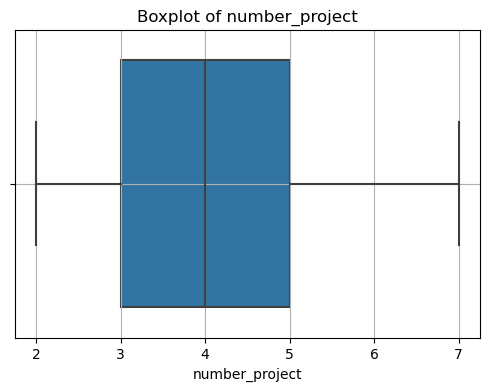

In [235]:
box_plot('number_project')

## there is no outtlier for the number_project variable, the data is normally distributed

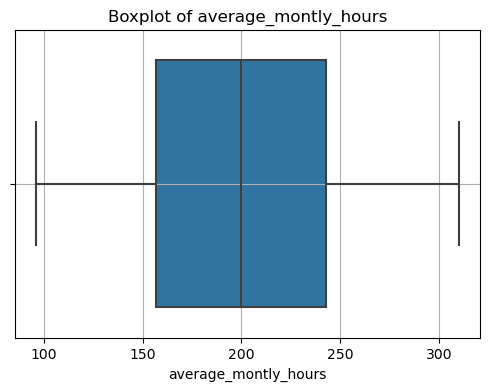

In [236]:
box_plot('average_montly_hours')

## there is no outtlier for the average_monthly_hours variable, the data is normally distributed

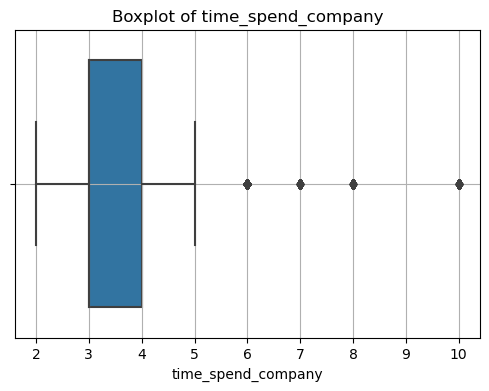

In [237]:
box_plot('time_spend_company')

## the time_spend_compnay has outliers 

In [238]:
## EDA
df['left_company'].value_counts(normalize = True)
## we can see that 10000 (83%) stayed in the company whie 1991(16%) left

left_company
0    0.833959
1    0.166041
Name: proportion, dtype: float64

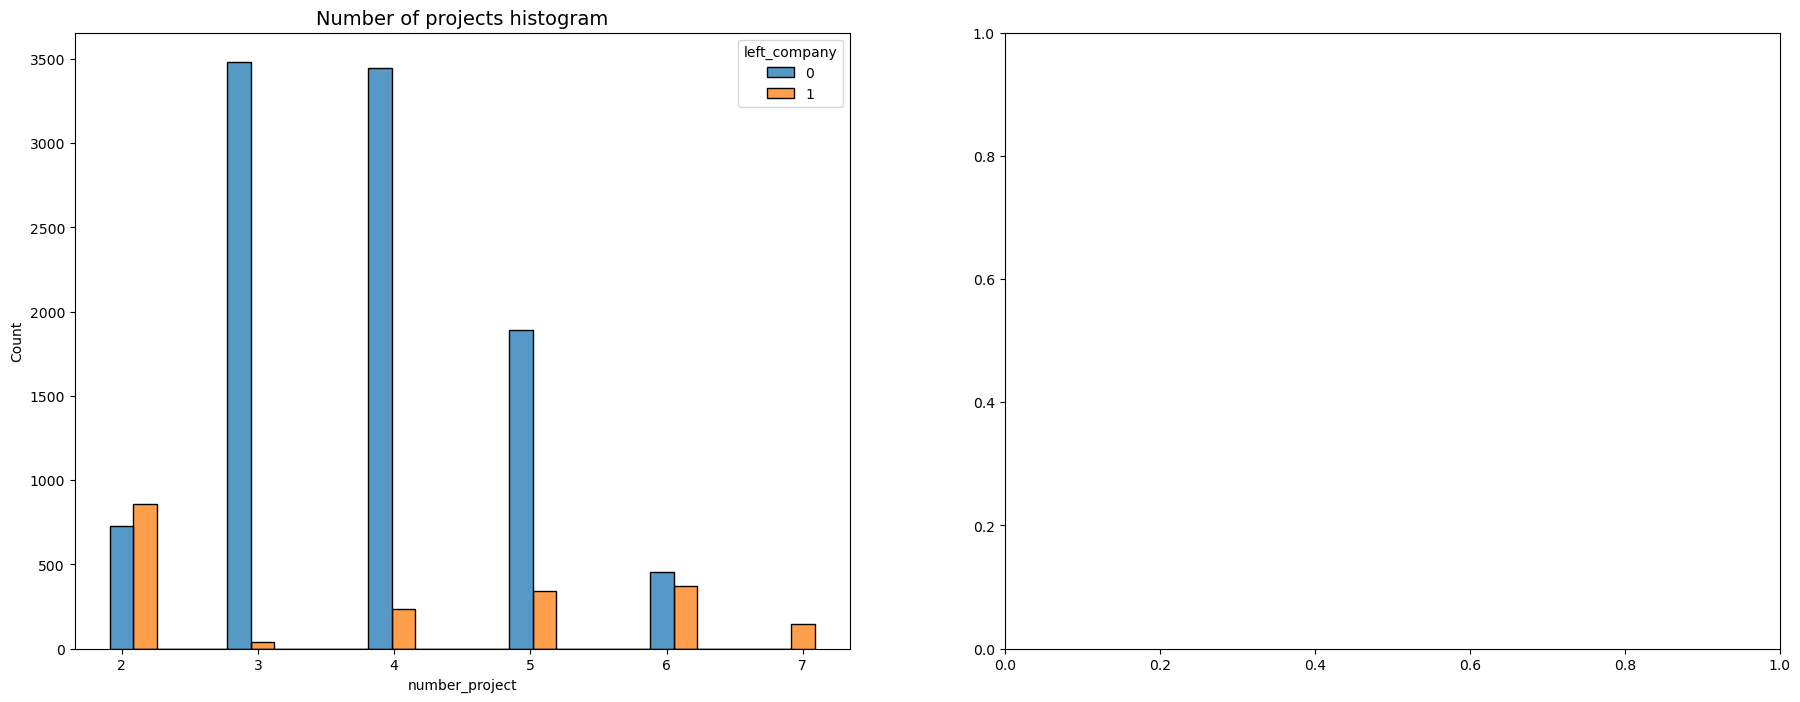

In [239]:
## histogram show the amount of orojects to the employees leaving
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.histplot(data=df, x='number_project', hue='left_company', multiple='dodge', shrink=2, ax=ax[0])
ax[0].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

## the majority of people that left the compnay had an 6-7 projects

In [256]:
df[df['number_project']==7]['left_company'].value_counts()

## 145 left the compnay had been working on 7 projects

left_company
1    145
Name: count, dtype: int64

In [240]:
df['left_company'].value_counts()

left_company
0    10000
1     1991
Name: count, dtype: int64

In [241]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_company,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [242]:
df.groupby('Department')['average_montly_hours'].sum()

## we know that slaes work the most hours per month

Department
IT             195823
RandD          139696
accounting     124745
hr             119822
management      87867
marketing      134255
product_mng    136441
sales          648584
support        365342
technical      451303
Name: average_montly_hours, dtype: int64

In [243]:
df.groupby('salary')['average_montly_hours'].sum()
## the majority of the prople working the mpst hours are the prople with low salary

salary
high       198067
low       1150521
medium    1055290
Name: average_montly_hours, dtype: int64

In [244]:
df.groupby('Department')['number_project'].sum()
## sales has the most projects.

Department
IT              3706
RandD           2672
accounting      2381
hr              2209
management      1673
marketing       2504
product_mng     2603
sales          12234
support         6958
technical       8660
Name: number_project, dtype: int64

In [245]:
df.groupby('Department')['left_company'].sum()
## the majority of people leaving are from sales, maybe because the work a lot 

Department
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left_company, dtype: int64

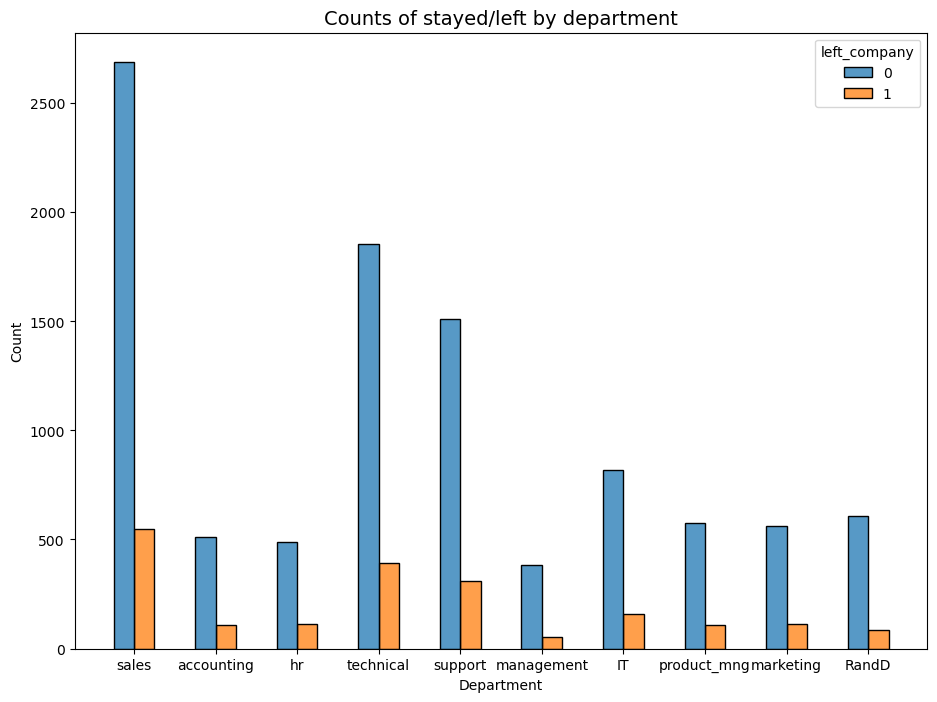

In [246]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='Department', hue='left_company', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by department', fontsize=14);

In [247]:
df.groupby('Department')['time_spend_company'].sum()

Department
IT              3270
RandD           2304
accounting      2114
hr              1957
management      1736
marketing       2303
product_mng     2292
sales          10950
support         5996
technical       7426
Name: time_spend_company, dtype: int64

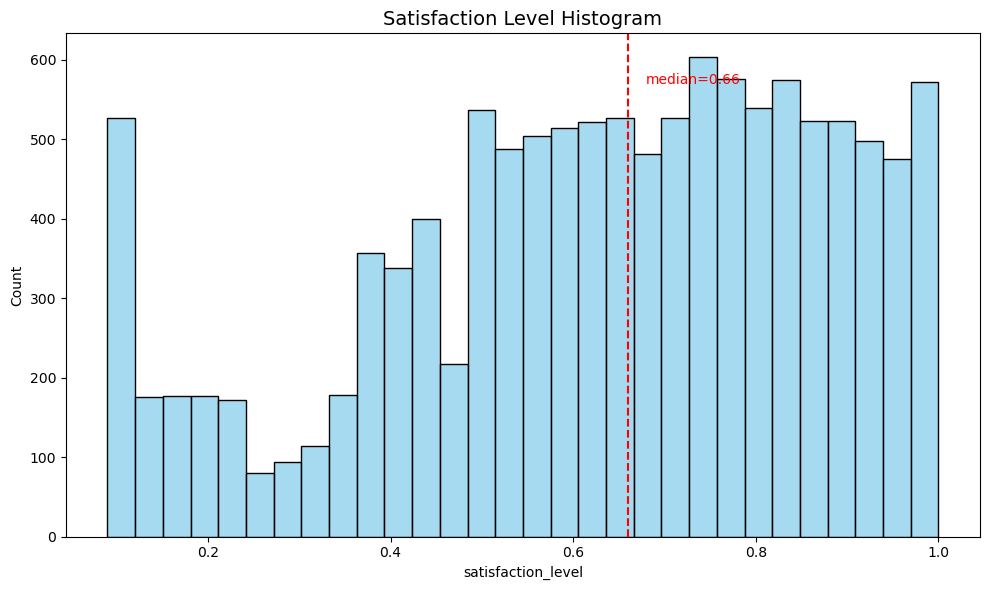

In [257]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(x=df['satisfaction_level'], bins=30, color='skyblue')

# Calculate median
median = df['satisfaction_level'].median()

# Add vertical line and text
plt.axvline(median, color='red', linestyle='--')
plt.text(median + 0.02, plt.ylim()[1]*0.9, f'median={median:.2f}', color='red')

# Add title
plt.title('Satisfaction Level Histogram', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [250]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_company,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [251]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [252]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_company,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


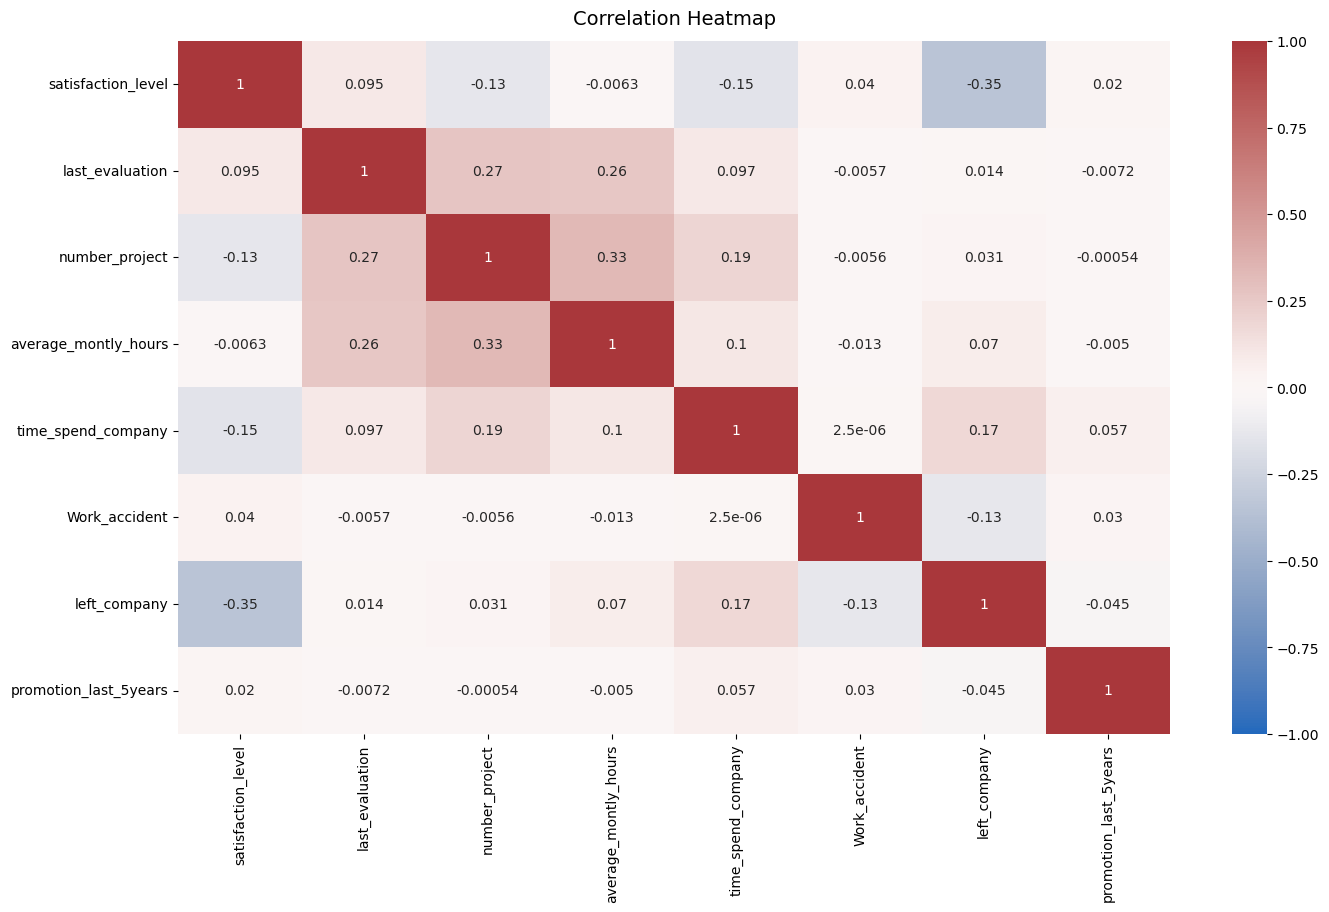

In [260]:
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

In [262]:
## from the heat map we can see that number of project and monthly hours are slightly correlated.

# It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer 
# working hours, many projects, and generally lower satisfaction levels.

In [271]:
df1 = df.copy()

# Define mapping dictionary
dept_map = {
    'hight': 1,
    'meduim': 2,
    'low': 3
}

# Apply mapping to the 'Department' column
df1['salary'] = df1['salary'].map(dept_map)

# Dummy encode the `department` column
df1 = pd.get_dummies(df1, drop_first=False)
df1 = df1.fillna(0).astype(int)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_company,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,2,157,3,0,1,0,3,0,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,3,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,3,0,0,0,0,0,0,0,1,0,0


In [275]:
## Build the model 


## separate X and y
X = df1.drop(['left_company'], axis = 1)
X = X.fillna(0)

y = df1['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [276]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
984,0,0,5,260,5,0,0,3,1,0,0,0,0,0,0,0,0,0
610,0,0,7,256,4,0,0,0,0,0,0,0,0,1,0,0,0,0
7033,0,0,3,134,4,0,0,0,0,0,0,0,0,0,0,1,0,0
6411,0,0,4,190,2,0,0,0,0,0,0,0,0,0,0,1,0,0
8388,0,0,3,217,4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [277]:
## fit the Log regression

model = LogisticRegression(penalty= 'none', max_iter=400)

model.fit(X_train, y_train)

/Users/alikrisht/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty='none')

In [278]:
## Get the coff.

pd.Series(model.coef_[0], index=X.columns)

## satisfaction level play a major role in wether the persdon leaves or not, keeping everything constant
# a 1 unit increate in satisfaction level will decrease the potential of the employee leaving. 

satisfaction_level       -1.637013
last_evaluation           1.444746
number_project           -0.073851
average_montly_hours      0.002921
time_spend_company        0.327835
Work_accident            -1.381038
promotion_last_5years    -1.488793
salary                    0.191600
Department_IT            -0.245191
Department_RandD         -0.595328
Department_accounting    -0.191495
Department_hr            -0.108848
Department_management    -0.868492
Department_marketing     -0.204430
Department_product_mng   -0.353068
Department_sales         -0.164071
Department_support       -0.171837
Department_technical     -0.135729
dtype: float64

In [279]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [280]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.83288859239493

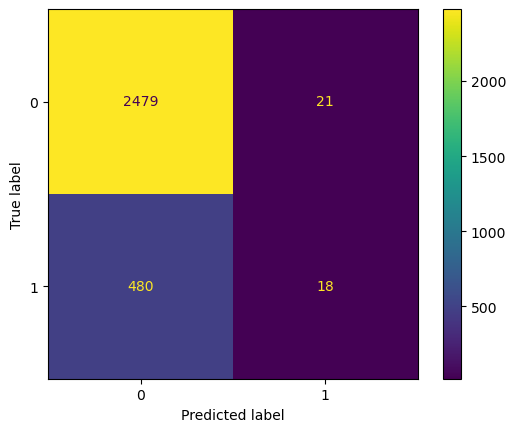

In [281]:
## cretating confusion matrix 

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays 
# the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right
# quadrant displays the number of true positives.

In [282]:
from sklearn.metrics import classification_report
# Create a classification report
print(classification_report(y_test, y_preds))

## The classification report above shows that the logistic regression model achieved a precision of 78%, 
## recall of 83%, f1-score of 77% (all weighted averages), and accuracy of 83%

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2500
           1       0.46      0.04      0.07       498

    accuracy                           0.83      2998
   macro avg       0.65      0.51      0.49      2998
weighted avg       0.78      0.83      0.77      2998



In [ ]:
## now after we found the important factor we need create a ML model that will predict the employees that will 
## most likley are the ones that leaves

In [288]:
## Decion Tree

tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [289]:
tree1_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'accuracy', 'precision', 'roc_auc'})

In [310]:
tree1_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

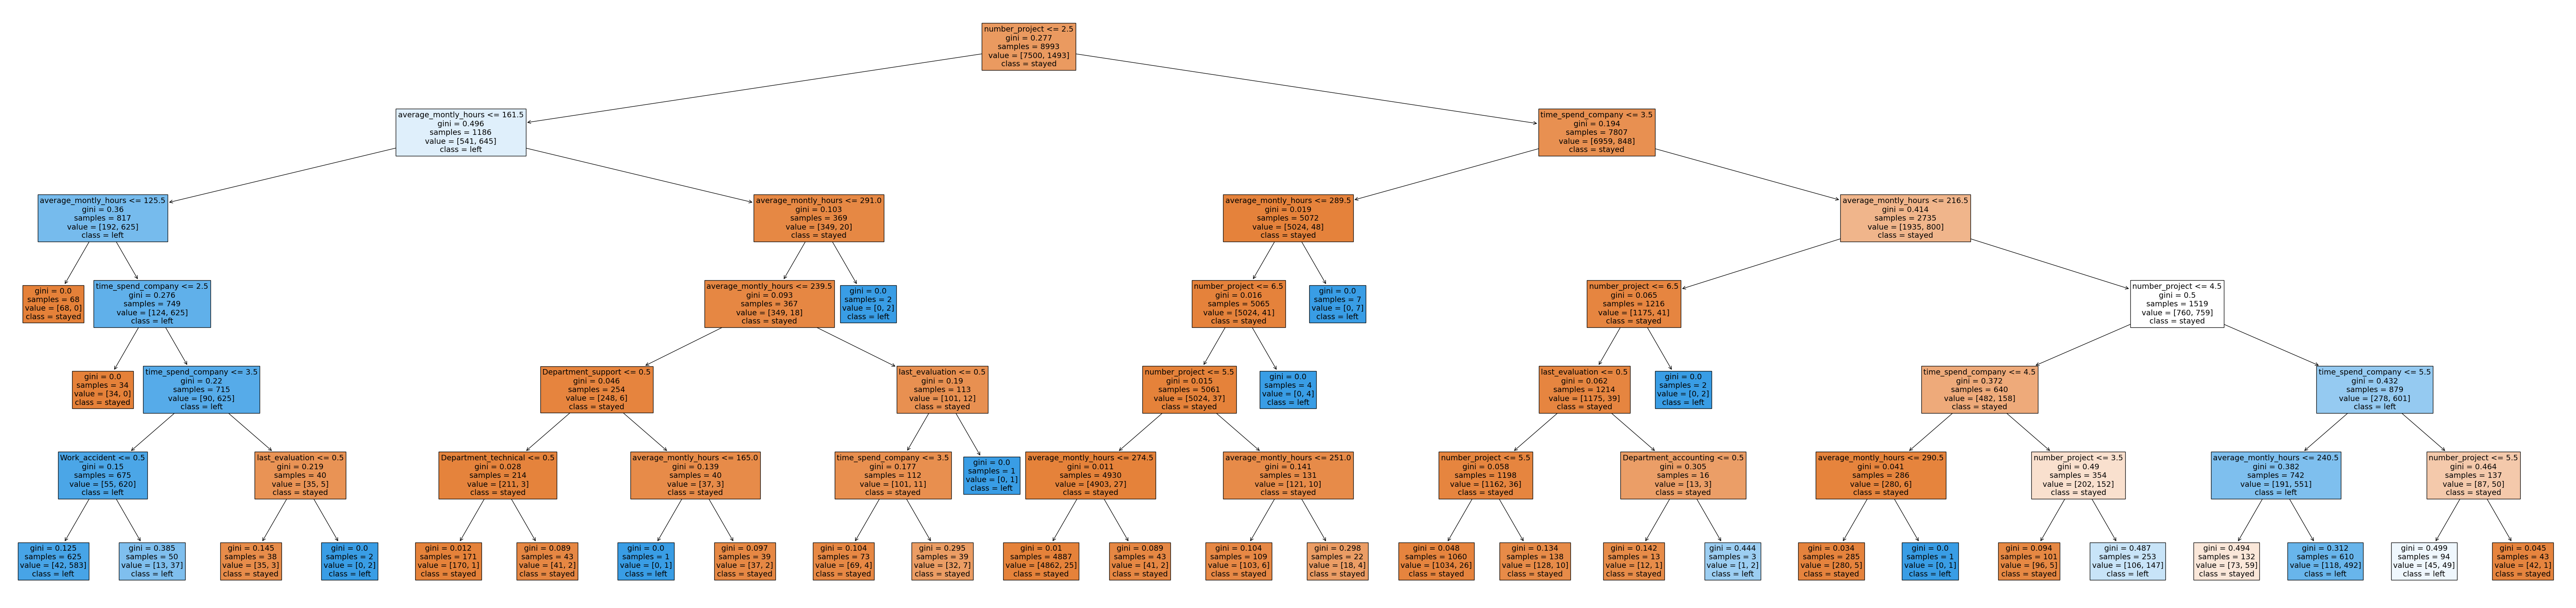

In [312]:
## ploting the decion tree

plt.figure(figsize=(85,20))

plot_tree(tree1_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [314]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
average_montly_hours,0.389121
number_project,0.339603
time_spend_company,0.264985
last_evaluation,0.003179
Work_accident,0.001947
Department_accounting,0.000959
Department_support,0.000142
Department_technical,0.000064


In [315]:
# Check best AUC score on CV
tree1_cv.best_score_

0.9634464151051598

In [292]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.829544,0.894161,0.8602,0.951739,0.963446


In [293]:
##Random Forest

rf = RandomForestClassifier(random_state=0)

# GridSearchCV 

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

rf_cv = rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [294]:
## find the best parameters

rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [296]:
rf_opt = RandomForestClassifier(n_estimators = 500, max_depth = None, 
                                min_samples_leaf = 2, min_samples_split = 2,
                                max_features = 1, max_samples = 0.7, random_state = 0)

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_features=1, max_samples=0.7, min_samples_leaf=2,
                       n_estimators=500, random_state=0)

In [297]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


rf_cv_results = make_results('Random Forest CV', rf_cv, metric = 'f1')
rf_cv_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.884328,0.874758,0.879389,0.960191


In [298]:
y_pred = rf_cv.predict(X_test)

In [299]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

rf_test_scores = get_test_scores('RF test', y_pred, y_test)
results = pd.concat([rf_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.884328,0.874758,0.879389,0.960191
0,RF test,0.879921,0.897590,0.888668,0.962642


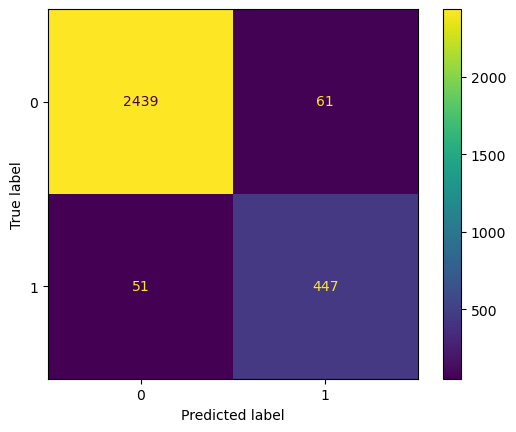

In [300]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()


conf_matrix_plot(rf_cv, X_test, y_test)

In [ ]:
## for the randon forest result the test data matched the validation score which is a good model.

In [301]:
## XGBoost

xgb = XGBClassifier(objective='binary:logistic', random_state=0) 



cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}



xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')


In [302]:
xgb_cv.fit(X_train, y_train)

/Users/alikrisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alikrisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alikrisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alikrisht/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classi

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [303]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


xgb_cv_results = make_results('XGB CV',xgb_cv, metric = 'f1')
xgb_cv_results

,model,precision,recall,F1,accuracy
0,XGB CV,0.882593,0.86405,0.873086,0.958301


In [304]:
## prediction on test data
xgb_cv_preds = xgb_cv.predict(X_test)

print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score final XGB model:  0.8952569169960474
Recall score final XGB model:  0.9096385542168675
Precision score final XGB model:  0.8813229571984436
Accuracy score final XGB model:  0.9646430953969313


In [305]:
xgb_test_scores = get_test_scores('XGB test', xgb_cv_preds, y_test)
results = pd.concat([results,xgb_cv_results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.884328,0.874758,0.879389,0.960191
0,RF test,0.879921,0.897590,0.888668,0.962642
0,XGB CV,0.882593,0.864050,0.873086,0.958301
0,XGB test,0.881323,0.909639,0.895257,0.964643


In [306]:
## with XGboost the model also did very well in predicting with accuracy of 98%.

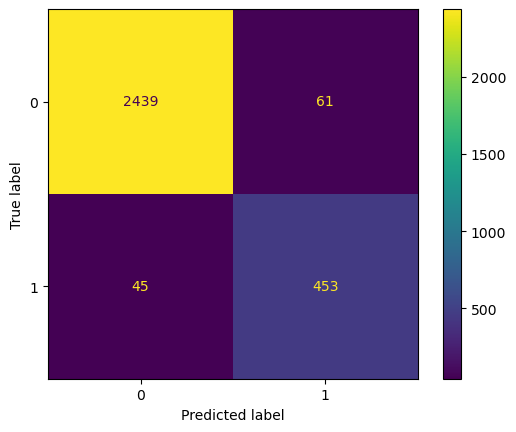

In [307]:
conf_matrix_plot(xgb_cv, X_test, y_test)

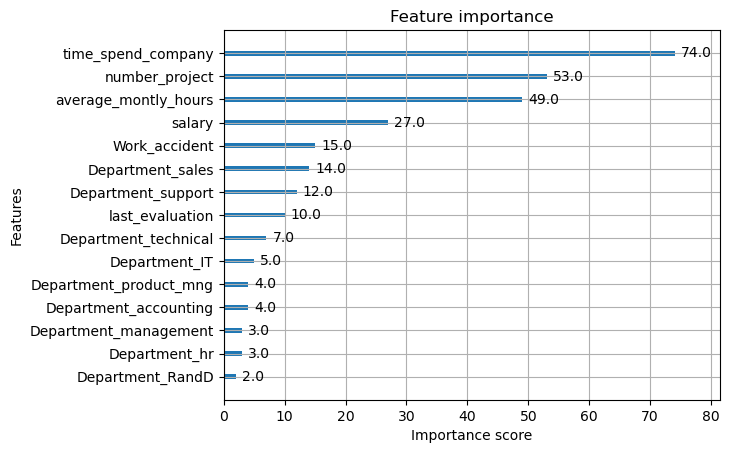

In [316]:
plot_importance(xgb_cv.best_estimator_);

## satisfaction level played the most important role in preeicting people leaving the company.

In [ ]:
## Conclusion:
## logistic regression:
## the model achieved a 83% acuraccy with 78% precision.

## Tree Based ML
## out of all the ML models XGboost outpreformed.

## Conclusion to stakeholder:

## 1 - Cap the number of projects each person can handel 
## 2 - promote people that has been in the compnay for a long time
## 3 - either reward people for working overtime or dont allow them to 